In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Imputation
from fancyimpute import IterativeImputer

# Visualize missing
import missingno as msno

%matplotlib inline

In [2]:
df_pdf = pd.read_csv('PDFMalware2022.csv')

# Display first 5 Rows.
df_pdf.head()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious


In [3]:
# Get a brief summary for our PDF dataset.
df_pdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fine name         10026 non-null  object 
 1   pdfsize           10025 non-null  float64
 2   metadata size     10025 non-null  float64
 3   pages             10025 non-null  float64
 4   xref Length       10025 non-null  float64
 5   title characters  10025 non-null  float64
 6   isEncrypted       10025 non-null  float64
 7   embedded files    10025 non-null  float64
 8   images            10025 non-null  object 
 9   text              10025 non-null  object 
 10  header            10025 non-null  object 
 11  obj               10023 non-null  object 
 12  endobj            10023 non-null  object 
 13  stream            10023 non-null  float64
 14  endstream         10023 non-null  object 
 15  xref              10023 non-null  object 
 16  trailer           10023 non-null  float6

In [4]:
# Check number of (Columns, Rows) in our dataset.
df_pdf.shape  #(31 features, 1 Fine Name, 1 Class -> 33)

(10026, 33)

In [5]:
# check data types for our dataset.
df_pdf.dtypes.value_counts()


object     21
float64    12
Name: count, dtype: int64

In [6]:

# Show Stats summary for our numeric/float64 columns.
df_pdf.describe()

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,stream,trailer,encrypt,ObjStm,Colors
count,10025.000000,10025.000000,10025.000000,10025.000000,10025.000000,10025.000000,10025.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000
mean,87.209476,334.099352,3.398105,2739.220549,51.477207,-0.020848,-0.006484,17.341215,1.203532,-0.043500,1.516811,2.087000
std,444.197122,1565.853177,11.902471,18139.229396,1354.640037,0.206789,0.257098,35.330169,1.370455,0.256045,7.633485,58.178074
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,9.000000,180.000000,1.000000,12.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,36.000000,265.000000,1.000000,21.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000
75%,80.000000,319.000000,2.000000,77.000000,13.000000,0.000000,0.000000,18.000000,2.000000,0.000000,0.000000,0.000000
max,23816.000000,77185.000000,595.000000,263987.000000,76993.000000,4.000000,5.000000,812.000000,46.000000,2.000000,600.000000,5682.000000


In [7]:
# Check total Missing values.
sum(df_pdf.isnull().sum())


74

In [8]:
# Check Missing values for each column
df_pdf.isnull().sum()

Fine name           0
pdfsize             1
metadata size       1
pages               1
xref Length         1
title characters    1
isEncrypted         1
embedded files      1
images              1
text                1
header              1
obj                 3
endobj              3
stream              3
endstream           3
xref                3
trailer             3
startxref           3
pageno              3
encrypt             3
ObjStm              3
JS                  3
Javascript          3
AA                  3
OpenAction          3
Acroform            3
JBIG2Decode         3
RichMedia           3
launch              3
EmbeddedFile        3
XFA                 3
Colors              3
Class               1
dtype: int64

In [9]:
# Display Missing values for specific column
df_pdf[df_pdf.Class.isnull()]

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
1339,3329abf72745a8483b96f60d48774177d2ca3f8ec37316...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Display 3 random Missing values
df_pdf[df_pdf.isnull().any(axis=1)].head(3)

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
1339,3329abf72745a8483b96f60d48774177d2ca3f8ec37316...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,a4c1e7dbcf95e3b9fae8ea506e770fa051d475a2cac962...,12.0,180.0,1.0,9.0,0.0,0.0,0.0,0,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Malicious
2157,604f49700028d231aba380dce780a5f600e373f7fab406...,1.0,180.0,1.0,111612.0,0.0,0.0,0.0,0,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Malicious


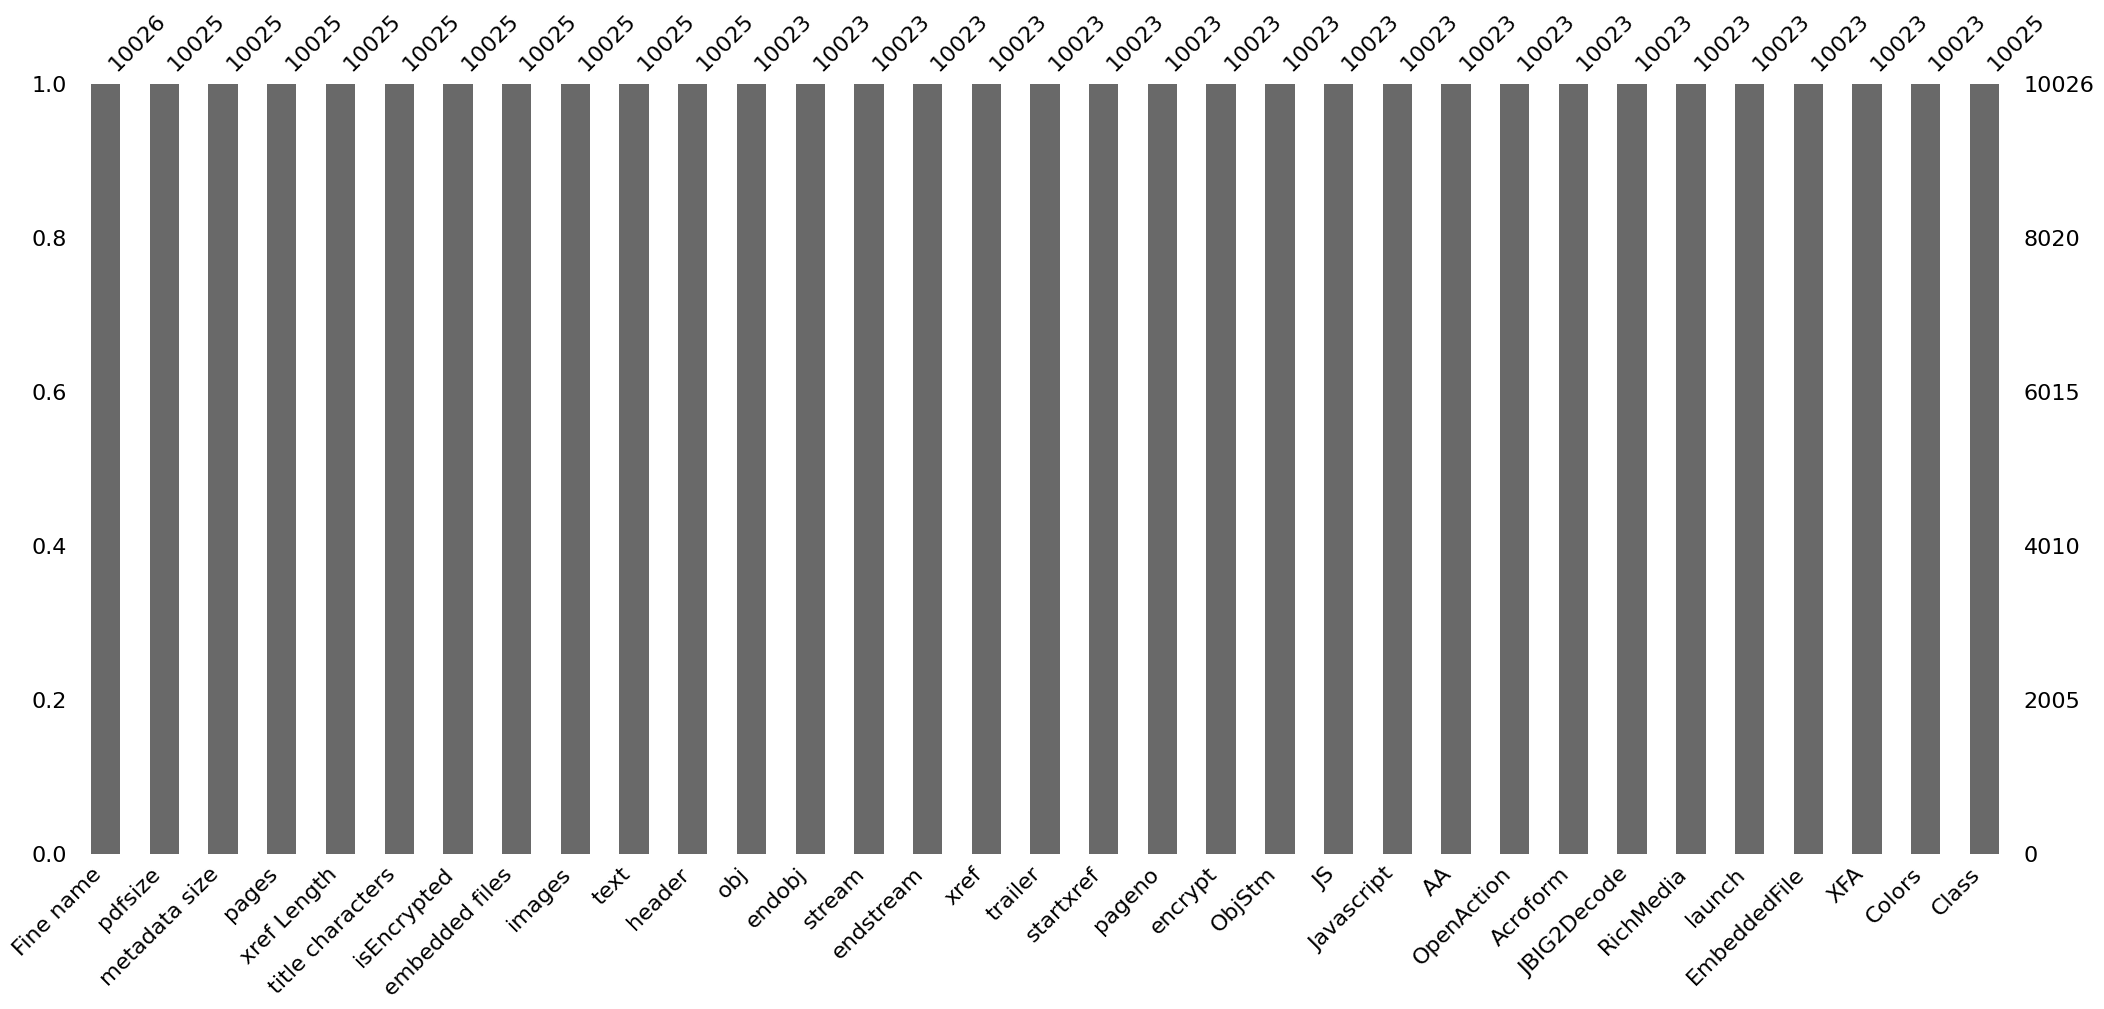

In [11]:
# Visualize Bar chart of missing values
msno.bar(df_pdf);

In [12]:
# store numerical columns to vaiable
numeric_columns = [x for x in df_pdf.columns if df_pdf[x].dtype != 'object'] # output 12 numerical variables

# identify Imputer
mice_imputer = IterativeImputer()

# Apply imputation 
df_pdf[numeric_columns] = mice_imputer.fit_transform(df_pdf[numeric_columns])

In [13]:
# Check missing after applied imputation 
df_pdf.isnull().sum()
df_pdf.text.unique()

array(['No', 'Yes', 'unclear', '-1', nan, '0'], dtype=object)

In [14]:
sum(df_pdf.isnull().sum())

52

In [15]:
# Drop Fine Name for now..
df_pdf.drop('Fine name', axis = 1, inplace= True)

# store categorical columns to independed vaiable
categorical_columns = [x for x in df_pdf.columns if df_pdf[x].dtype == 'object'] # output 20

# Check values of each categorical column that have missing value/s
for i in categorical_columns:
    print('Number of unique values for *{}*'.format(i), df_pdf[i].nunique())

Number of unique values for *images* 89
Number of unique values for *text* 5
Number of unique values for *header* 50
Number of unique values for *obj* 479
Number of unique values for *endobj* 478
Number of unique values for *endstream* 241
Number of unique values for *xref* 21
Number of unique values for *startxref* 20
Number of unique values for *pageno* 96
Number of unique values for *JS* 32
Number of unique values for *Javascript* 35
Number of unique values for *AA* 40
Number of unique values for *OpenAction* 8
Number of unique values for *Acroform* 10
Number of unique values for *JBIG2Decode* 16
Number of unique values for *RichMedia* 7
Number of unique values for *launch* 5
Number of unique values for *EmbeddedFile* 19
Number of unique values for *XFA* 7
Number of unique values for *Class* 2


In [16]:
# Impute categorical missing with most frequent of each column
# Source: https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)
        print(self)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
 # Apply miputation Function   
df_pdf[categorical_columns] = DataFrameImputer().fit_transform(df_pdf[categorical_columns])

In [17]:
df_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   isEncrypted       10026 non-null  float64
 6   embedded files    10026 non-null  float64
 7   images            10026 non-null  object 
 8   text              10026 non-null  object 
 9   header            10026 non-null  object 
 10  obj               10026 non-null  object 
 11  endobj            10026 non-null  object 
 12  stream            10026 non-null  float64
 13  endstream         10026 non-null  object 
 14  xref              10026 non-null  object 
 15  trailer           10026 non-null  float64
 16  startxref         10026 non-null  object

In [18]:
sum(df_pdf.isnull().sum())

0

In [19]:
# Check duplicate points in our dataset
df_pdf=df_pdf.dropna()
df_pdf.duplicated().sum() # No duplicates

0

In [20]:
# Check number of samples for each class [Benign, Malicious]
df_pdf.Class.value_counts()


Class
Malicious    5558
Benign       4468
Name: count, dtype: int64

In [21]:
df_pdf.head()


,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,\t%PDF-1.6,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious


In [22]:
data = df_pdf 
data.head()


,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,\t%PDF-1.6,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

 # Assuming df_pdf is your DataFrame
data.iloc[:, 31] = data.iloc[:, 31].map({'Malicious': 1, 'Benign': 0})
data.iloc[:, 8] = data.iloc[:, 8].map({'Yes': 1, 'No': 0,'unclear':0,"-1":0,"0":0})
data.head()

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,0,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,1
1,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,0,\t%PDF-1.6,...,0,0,1,0,0,0,8,1,0.0,1
2,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,1,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,1
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,0,\t%PDF-1.3,...,0,1,1,0,0,0,0,0,0.0,1
4,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,1,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,1


In [24]:
from sklearn.preprocessing import LabelEncoder

original_values = np.array(['\t%PDF-1.3', '\t%PDF-1.6', '\t%PDF-1.5', '\t%PDF-1.4',
                            '\t%PDF-\\x07.3', '\t%PDF-1.0', '\t%PDF-1.7', '\t%PDF-1.1',
                            '\t%PDF-1.6%â', '\t%PDF-1.', '\t%PDF-1.3%ï', '\t%PDF-1.2',
                            '\t%PDF-aaa', '\t%PDF-11311', '\t2]', '\ta', '\t%PDF-11113',
                            '\t%PDF-1.544', '\t%PDF-1.344', '\t%PDF-13131', '\t%PDF-\\x00.4',
                            '\t%PDF-0.9', '\t%PDF-2.4', '\t%PDF-1.8', '\t%PDF-1.6"',
                            '\t%PDF-\\\\\\\\x07', '\t%PDF-1.1"', '\t%PDF-1.3"', '\t%PDF-1.5"',
                            '\t%PDF-1.4"', '\toccured*', '\t%PDF-1.0"', '\t%PDF-1.7"',
                            '\t%PDF-1.4\\\\n', '\t%PDF-1.3\\\\n', '\t%PDF-2.4"', '\t%PDF-1."',
                            '\t%PDF-1.2"', '\t%PDF-1.0\\\\n', '\t%PDF-aaa"', '1', '0',
                            '\t/bin/sh: 1: _Cunningham_Studio.pdf: not found',
                            '\tError opening file /mnt/hgfs/kali_stuff/CLEAN_PDF_9000_files/Albert_Berger',
                            "\t[Errno 2] No such file or directory: '/mnt/hgfs/kali_stuff/CLEAN_PDF_9000_files/Albert_Berger",
                            '\t/bin/sh: 1: Syntax error: "(" unexpected',
                            '\t/bin/sh: 1: Syntax error: Unterminated quoted string', '\tyour',
                            '-1',
                            '\tError opening file /mnt/hgfs/kali_stuff/CLEAN_PDF_9000_files/Inheritances'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the original values
numeric_values = label_encoder.fit_transform(original_values)

# Create a mapping of original values to numeric values
value_mapping = {original: encoded for original, encoded in zip(original_values, numeric_values)}

# Convert the 10th column using the mapping
data.iloc[:,9] = df_pdf.iloc[:,9].map(value_mapping)
data.header.unique()

array([10.0, 21.0, 18.0, 15.0, 34.0, 3.0, 24.0, 6.0, 23.0, 1.0, 12.0, 8.0,
       35.0, 28.0, 40.0, 44.0, 27.0, 20.0, 13.0, 29.0, 33.0, 0.0, 30.0,
       26.0, 22.0, 32.0, 7.0, 11.0, 19.0, 16.0, nan, 4.0, 25.0, 17.0,
       14.0, 31.0, 2.0, 9.0, 5.0, 36.0, 49.0, 48.0, 39.0, 41.0, 43.0,
       37.0, 38.0, 46.0, 47.0, 42.0], dtype=object)

In [25]:
data.iloc[:, 7] = data.iloc[:, 7].map({'0':0, '-1':0, '15':15, '1':1, '2':2, '4':4, '3':3, '6':6, '12':12, '7':7, '5':5, '14':14,
       '8':8, '11':11, '32':32, '30':30, '18':18, '9':9, '34':34, '19':19, '369':369, '21':21, '23':23,
       '81':81, '24':24, '898':898, '1(1)':0, '68':68, '41':41, '52':52, '54':54, '46':46, '207':207,
       '13':13, '28':28, '17':17, '10':10, '16':16, '20':20, '22':22, '27':27, '47':47, '26':26, '31':31,
       '25':25, '29':29, '37':37, '75':75, '39':39, '40':40, '45':45, '36':36, '42':42, '50':50, '111':111,
       '84':84, '38':38, '66':66, '71':71, '44':44, '172':172, '109':109, '57':57, '48':48, '62':62, '43':43,
       '35':35, '33':33, '76':76, '72':72, '83':83, '86':86, '60':60, '99':99, '95':95, '94':94, '92':92,
       '97':97, '88':88, '89':89, '90':90, '78':78, '79':79, '56':56, '58':58, '592':592, '61':61, '107':107,
       '126':126})

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   isEncrypted       10026 non-null  float64
 6   embedded files    10026 non-null  float64
 7   images            10026 non-null  object 
 8   text              10026 non-null  object 
 9   header            10004 non-null  object 
 10  obj               10026 non-null  object 
 11  endobj            10026 non-null  object 
 12  stream            10026 non-null  float64
 13  endstream         10026 non-null  object 
 14  xref              10026 non-null  object 
 15  trailer           10026 non-null  float64
 16  startxref         10026 non-null  object

In [27]:

# Assuming 'data' is your DataFrame
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting non-convertible values to NaN
data.fillna(0, inplace=True)  #


data.head() # Ensure data is loaded correctly




,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,0,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,0,21.0,...,0.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,0.0,1
2,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,1,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,0,10.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,1,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [28]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   isEncrypted       10026 non-null  float64
 6   embedded files    10026 non-null  float64
 7   images            10026 non-null  int64  
 8   text              10026 non-null  int64  
 9   header            10026 non-null  float64
 10  obj               10026 non-null  float64
 11  endobj            10026 non-null  float64
 12  stream            10026 non-null  float64
 13  endstream         10026 non-null  float64
 14  xref              10026 non-null  float64
 15  trailer           10026 non-null  float64
 16  startxref         10026 non-null  float6

In [29]:
# Dropping column 1 (index 0), column 5 (index 4), and keeping necessary columns
X = data.drop(columns=[ data.columns[31]])  # Adjusted indices
y = data.iloc[:, 31]
X.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   isEncrypted       10026 non-null  float64
 6   embedded files    10026 non-null  float64
 7   images            10026 non-null  int64  
 8   text              10026 non-null  int64  
 9   header            10026 non-null  float64
 10  obj               10026 non-null  float64
 11  endobj            10026 non-null  float64
 12  stream            10026 non-null  float64
 13  endstream         10026 non-null  float64
 14  xref              10026 non-null  float64
 15  trailer           10026 non-null  float64
 16  startxref         10026 non-null  float6

In [30]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10026 entries, 0 to 10025
Series name: Class
Non-Null Count  Dtype
--------------  -----
10026 non-null  int64
dtypes: int64(1)
memory usage: 78.5 KB


In [31]:
# Ensure y is aligned with X
y = y.iloc[:X.shape[0]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



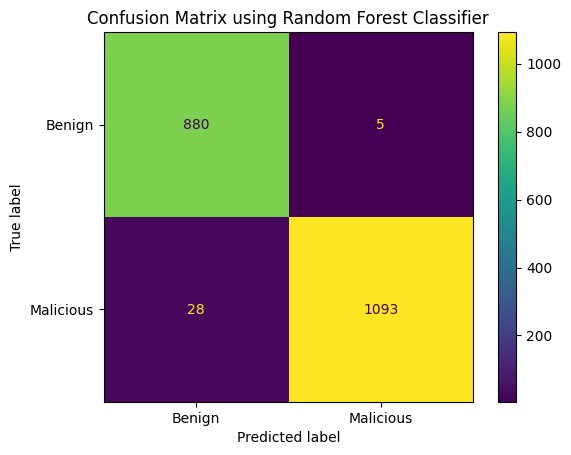

False Positive Rate: 0.005649717514124294
True Positive Rate: 0.9750223015165032
Accuracy Score: 0.9835493519441675


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=2, max_depth=500, random_state=42, max_features='log2')

# Train the model
rf.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rf)}')

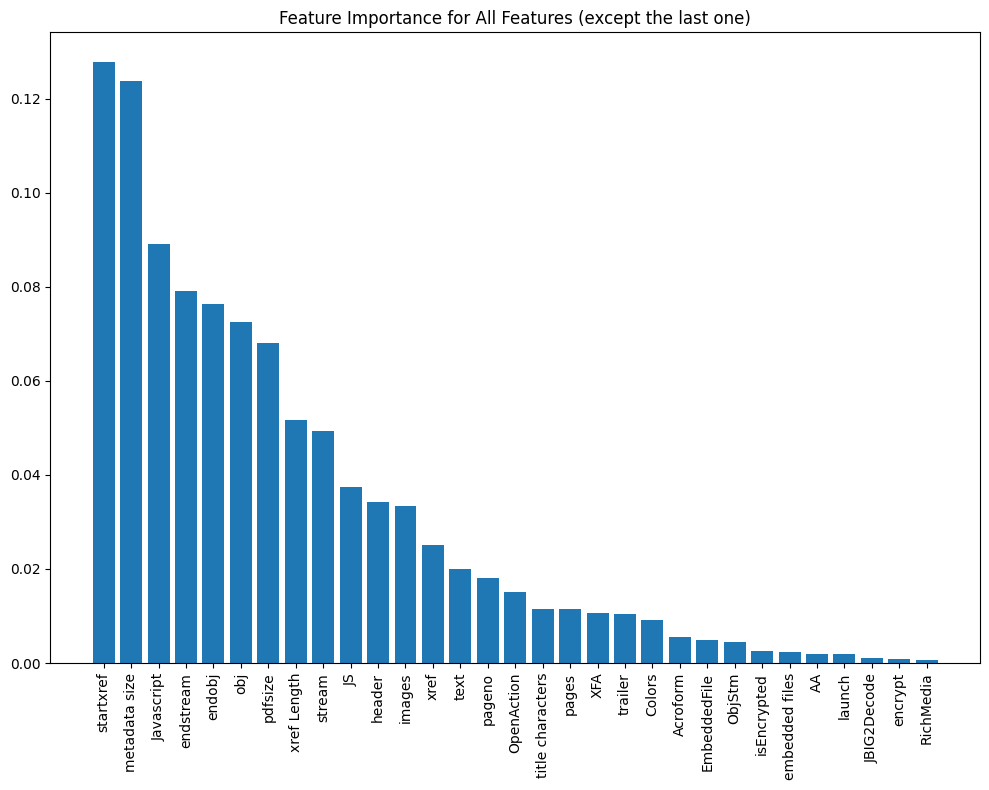

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming your dataset is in 'df'

# Separate features (all columns except the last one) and target (the last column)
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # The last column as the target

# If your dataframe is a pandas DataFrame, get feature names (column names except the last one)
feature_names = data.columns[:-1]

# Train the Random Forest model using all features
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

# Extract feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance graph
plt.figure(figsize=(10, 8))
plt.title("Feature Importance for All Features (except the last one)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()



In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   isEncrypted       10026 non-null  float64
 6   embedded files    10026 non-null  float64
 7   images            10026 non-null  int64  
 8   text              10026 non-null  int64  
 9   header            10026 non-null  float64
 10  obj               10026 non-null  float64
 11  endobj            10026 non-null  float64
 12  stream            10026 non-null  float64
 13  endstream         10026 non-null  float64
 14  xref              10026 non-null  float64
 15  trailer           10026 non-null  float64
 16  startxref         10026 non-null  float6

In [35]:
X1 = data.drop(columns=[data.columns[6],data.columns[5],data.columns[22],data.columns[27],data.columns[25],data.columns[18],data.columns[26], data.columns[31]])  # Adjusted indices
y1 = data.iloc[:, 31]
X1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   images            10026 non-null  int64  
 6   text              10026 non-null  int64  
 7   header            10026 non-null  float64
 8   obj               10026 non-null  float64
 9   endobj            10026 non-null  float64
 10  stream            10026 non-null  float64
 11  endstream         10026 non-null  float64
 12  xref              10026 non-null  float64
 13  trailer           10026 non-null  float64
 14  startxref         10026 non-null  float64
 15  pageno            10026 non-null  float64
 16  ObjStm            10026 non-null  float6

In [36]:
# Ensure y is aligned with X
y1 = y1.iloc[:X1.shape[0]]

# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)



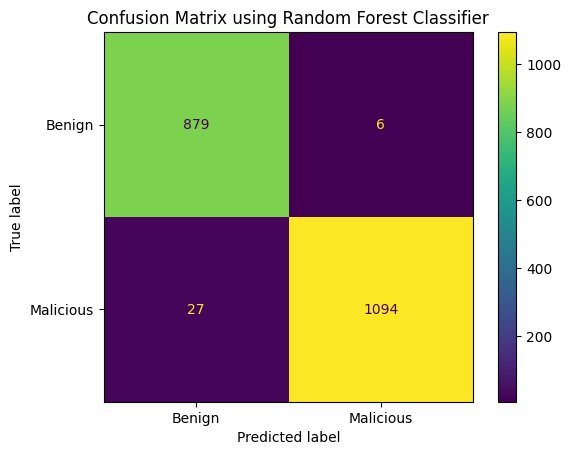

False Positive Rate: 0.006779661016949152
True Positive Rate: 0.975914362176628
Accuracy Score: 0.9835493519441675


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Initialize Random Forest Classifier
rf1 = RandomForestClassifier(n_estimators=2, max_depth=500, random_state=42, max_features='log2')

# Train the model
rf1.fit(X_train1, y_train1)

# Make Predictions
y_pred_rf1 = rf1.predict(X_test1)

# Confusion Matrix
tn1, fp1, fn1, tp1 = confusion_matrix(y_test1, y_pred_rf1).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test1, y_pred_rf1), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp1 / (fp1 + tn1)}')
print(f'True Positive Rate: {tp1 / (tp1 + fn1)}')
print(f'Accuracy Score: {accuracy_score(y_test1, y_pred_rf1)}')

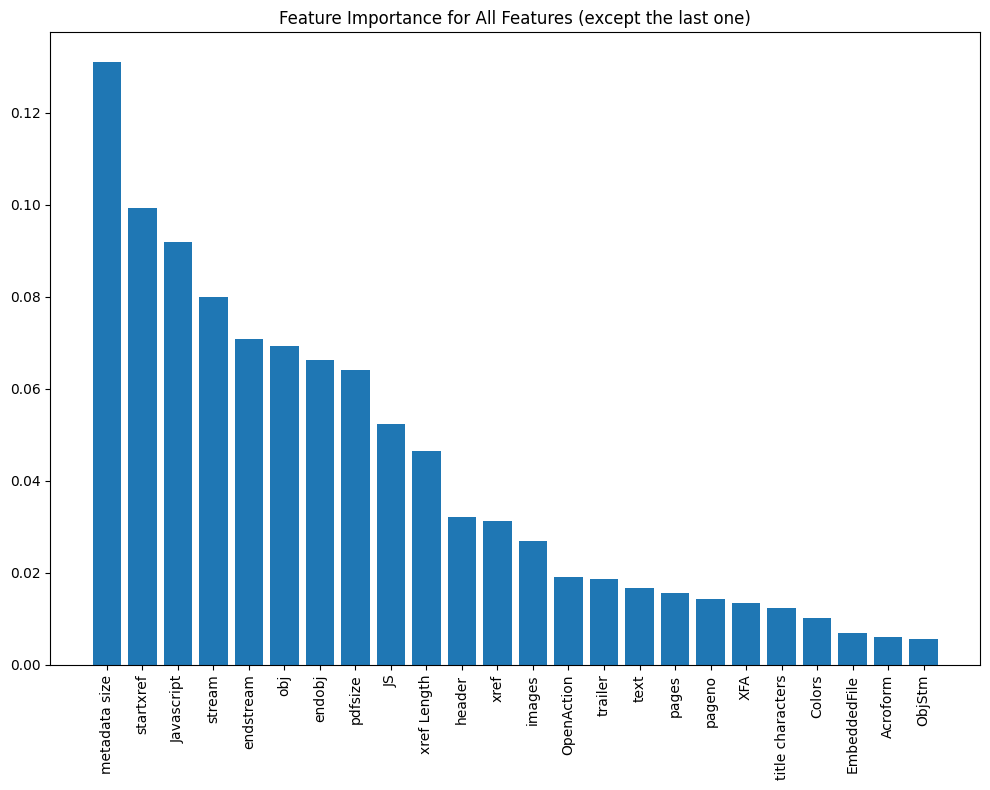

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


# If your dataframe is a pandas DataFrame, get feature names (column names except the last one)
feature_names = X1.columns[:]

# Train the Random Forest model using all features
rf1 = RandomForestClassifier(n_estimators=200, random_state=42)
rf1.fit(X1, y1)

# Extract feature importances
importances = rf1.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance graph
plt.figure(figsize=(10, 8))
plt.title("Feature Importance for All Features (except the last one)")
plt.bar(range(X1.shape[1]), importances[indices], align="center")
plt.xticks(range(X1.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

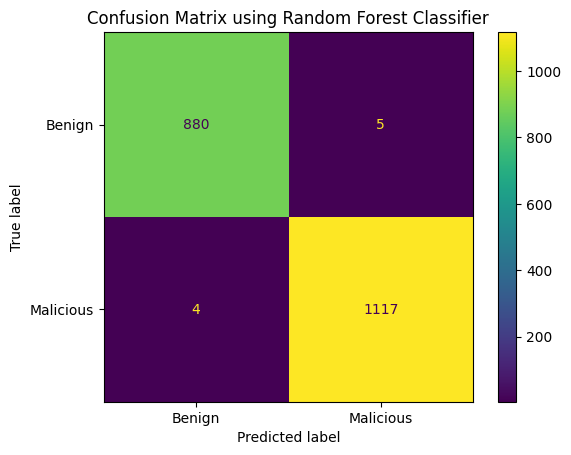

False Positive Rate: 0.005649717514124294
True Positive Rate: 0.9964317573595004
Accuracy Score: 0.9955134596211366


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Initialize Random Forest Classifier

rf4 = RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=200)

# Train the model
rf4.fit(X_train, y_train)

# Make Predictions
y_pred_rf4 = rf4.predict(X_test)

# Confusion Matrix
tn4, fp4, fn4, tp4 = confusion_matrix(y_test, y_pred_rf4).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf4), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp4 / (fp4 + tn4)}')
print(f'True Positive Rate: {tp4 / (tp4 + fn4)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rf4)}')